In [1]:
import dexplor_utils
%matplotlib inline

In [2]:
all_train, spray, weather, test, enrich = dexplor_utils.load_data()

/Users/aviavidan/anaconda3/envs/TF/lib/python3.6/site-packages/pandas/core/indexing.py:189: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)



name: train, rows: 10506, columns: 12, null values: 0

name: spray, rows: 14835, columns: 4, null values: 584

name: weather, rows: 2944, columns: 22, null values: 0

name: test, rows: 116293, columns: 11, null values: 0

name: enrich, rows: 27196, columns: 13, null values: 12324

name: train, date range: 2007-05-29 - 2013-09-26

name: spray, date range: 2011-08-29 - 2013-09-05

name: weather, date range: 2007-05-01 - 2014-10-31

name: test, date range: 2008-06-11 - 2014-10-02

name: enrich, date range: 05/28/2009 12:05:00 AM - 10/09/2007 12:10:00 AM


In [3]:
all_train.shape, spray.shape, weather.shape, test.shape, enrich.shape

((10506, 12), (14835, 4), (2944, 22), (116293, 11), (27197, 13))

In [4]:
print('\nwnv positive date range: {} - {}'.format(
      str(all_train[all_train['WnvPresent'] == 1]['Date'].min()).split()[0], 
      str(all_train[all_train['WnvPresent'] == 1]['Date'].max()).split()[0]))


wnv positive date range: 2007-07-18 - 2013-09-26


### Data Exploration & Visualization

In [5]:
dexplor_utils.validate_uniques_vals(test, all_train)
dexplor_utils.validate_lat_lng(test, all_train)

feature:Species, # uniques in testset:8, # uniques in trainset:7
feature:Species, # of missing uniques in train:1
['UNSPECIFIED CULEX']
feature:Block, # uniques in testset:65, # uniques in trainset:64
feature:Block, # of missing uniques in train:1
[26]
feature:Street, # uniques in testset:139, # uniques in trainset:128
feature:Street, # of missing uniques in train:11
[' W 112TH ST', ' S LOOMIS ST', ' W 120TH ST', ' S BALTIMORE AVE', ' S OGLESBY AVE', ' E 136TH ST', ' N KENNETH AVE', ' N KILBOURN AVE', ' N MELVINA AVE', ' W DAKIN ST', ' W 63RD PL']
feature:Trap, # uniques in testset:149, # uniques in trainset:136
feature:Trap, # of missing uniques in train:13
['T090A', 'T090B', 'T090C', 'T200A', 'T128A', 'T200B', 'T218A', 'T218C', 'T218B', 'T002A', 'T002B', 'T234', 'T065A']
feature:AddressAccuracy, # uniques in testset:4, # uniques in trainset:4
feature:AddressAccuracy, # of missing uniques in train:0

feature:Longitude, train_min_val:-87.930995, train_max_val:-87.531635
feature:Longitu

79 CULEX PIPIENS/RESTUANS
82 CULEX PIPIENS
32 CULEX RESTUANS


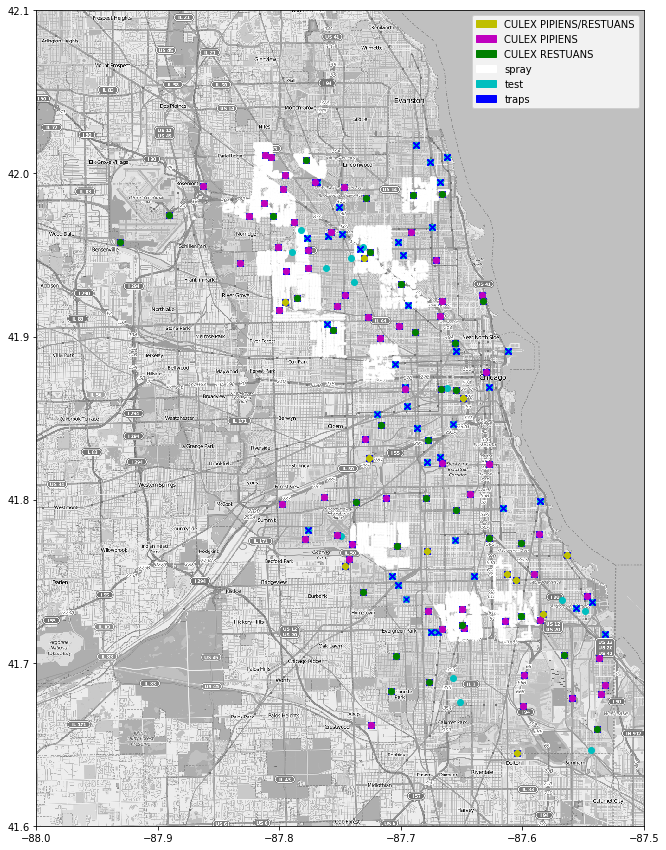

In [6]:
dexplor_utils.plot_on_map(all_train, test, spray)

In [7]:
all_train.groupby(
    by = ['Date', 'Trap'])['NumMosquitos', 'WnvPresent'].sum().sort_values('WnvPresent', ascending = False).head(10)

NumMosquitos  WnvPresent
Date       Trap                          
2013-08-29 T900           608          12
2007-08-16 T115          2636          11
2013-09-06 T900           550           9
2013-08-01 T900           984           9
2007-08-22 T138          1124           7
           T115          1615           7
2007-07-25 T115          3002           5
2011-08-12 T900           246           5
2007-08-15 T016           216           4
2007-08-22 T128           338           4

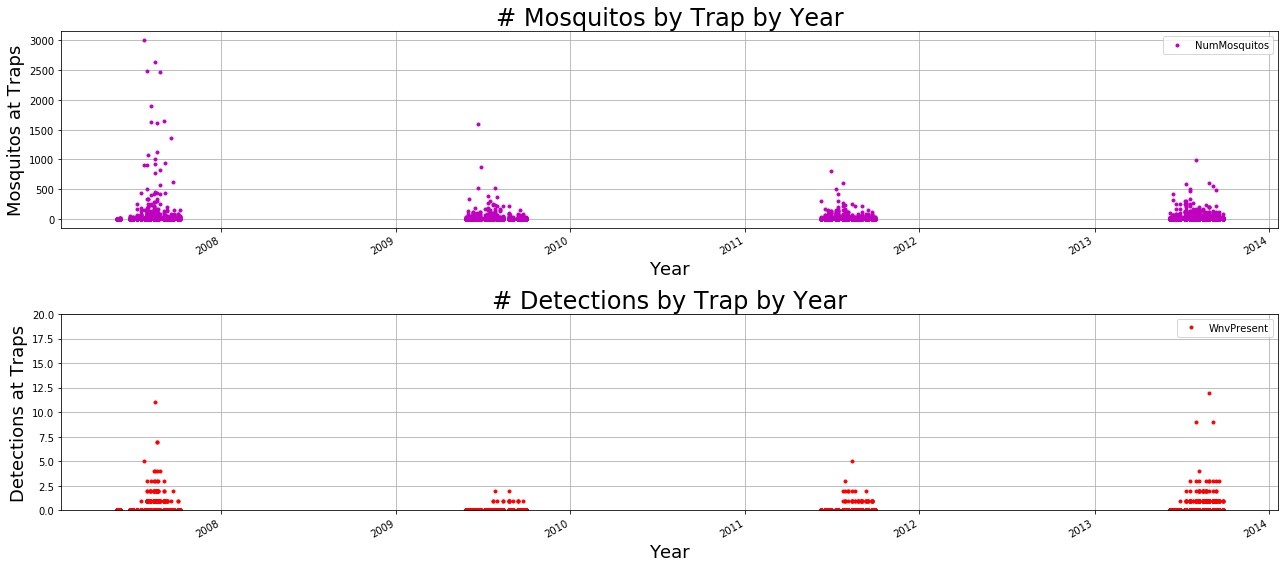

In [8]:
dexplor_utils.plot_detect_by_year(all_train)

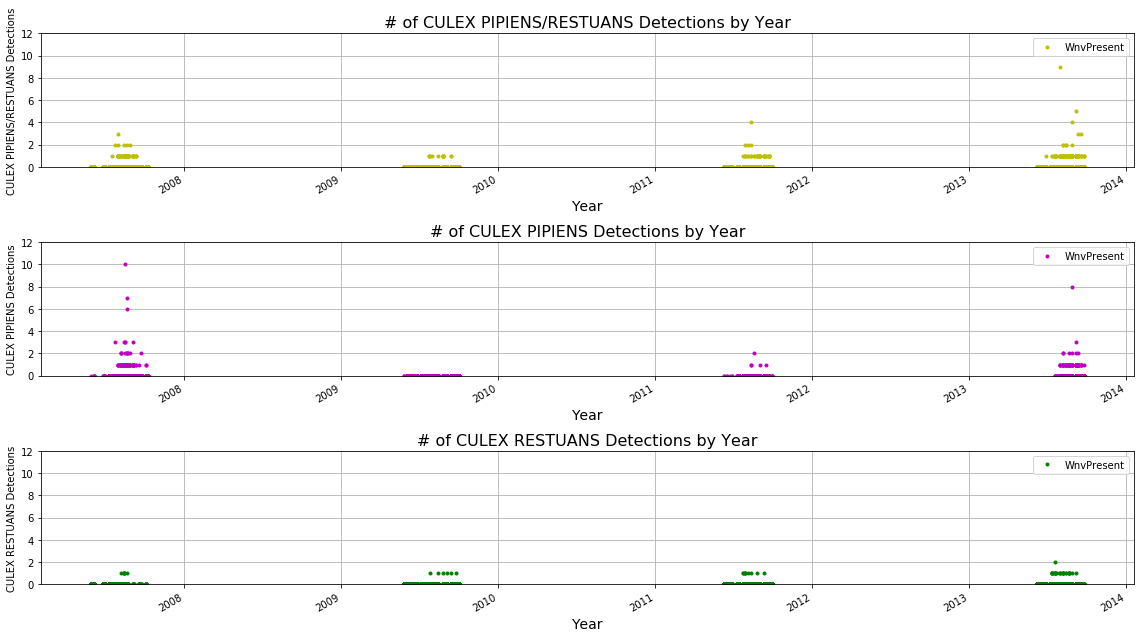

In [9]:
dexplor_utils.plot_detect_by_specie(all_train)

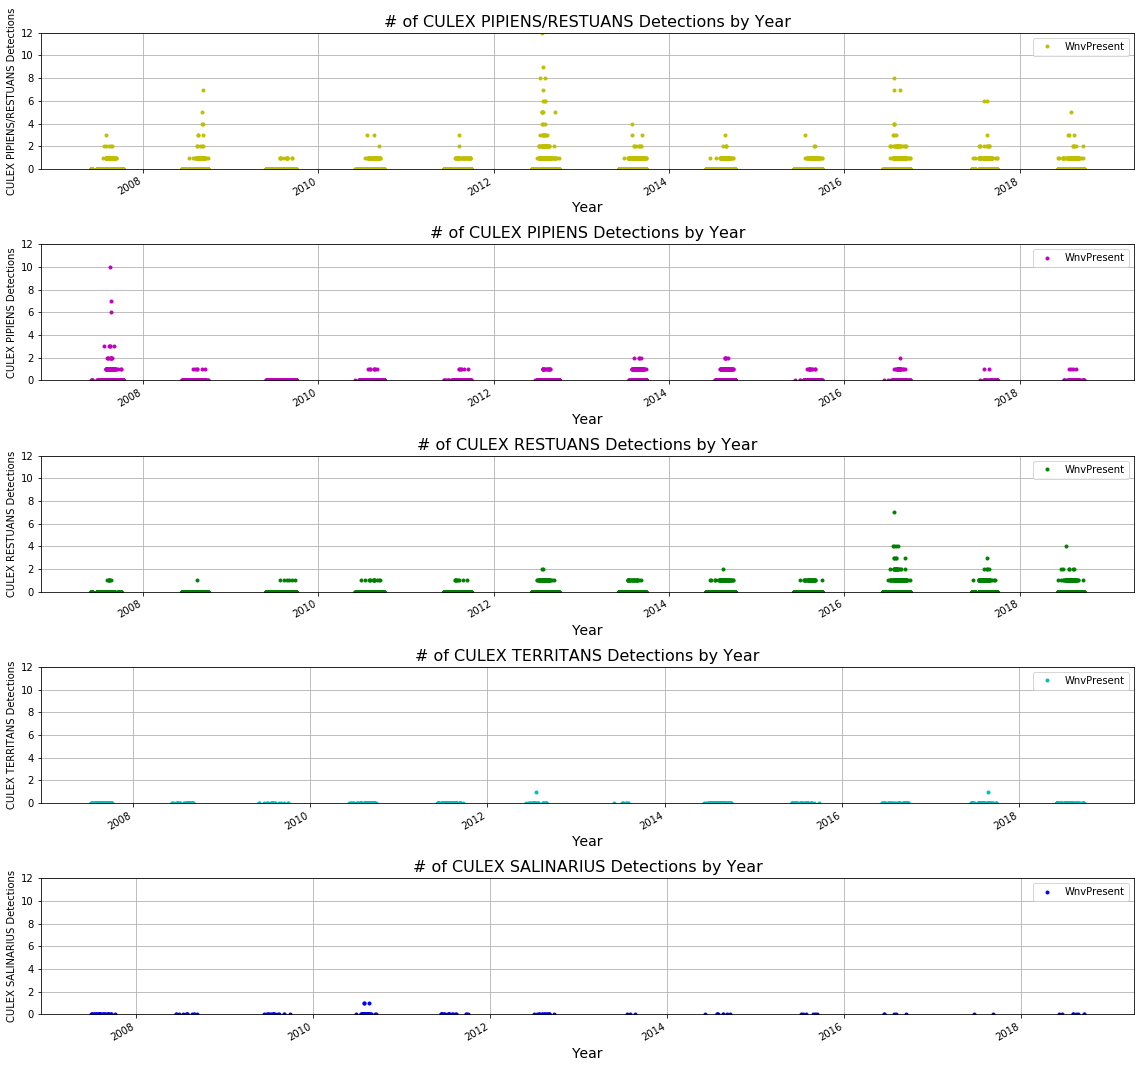

In [10]:
dexplor_utils.plot_detect_by_specie(enrich)

In [11]:
y_train = all_train[['WnvPresent']]
y_train.to_csv('y_train.csv', columns=y_train.columns.tolist())

#### add weather features and split by station

In [13]:
weather = weather[dexplor_utils.weather_cols]
weather_stat1, weather_stat2 = dexplor_utils.split_weather_by_station(weather)

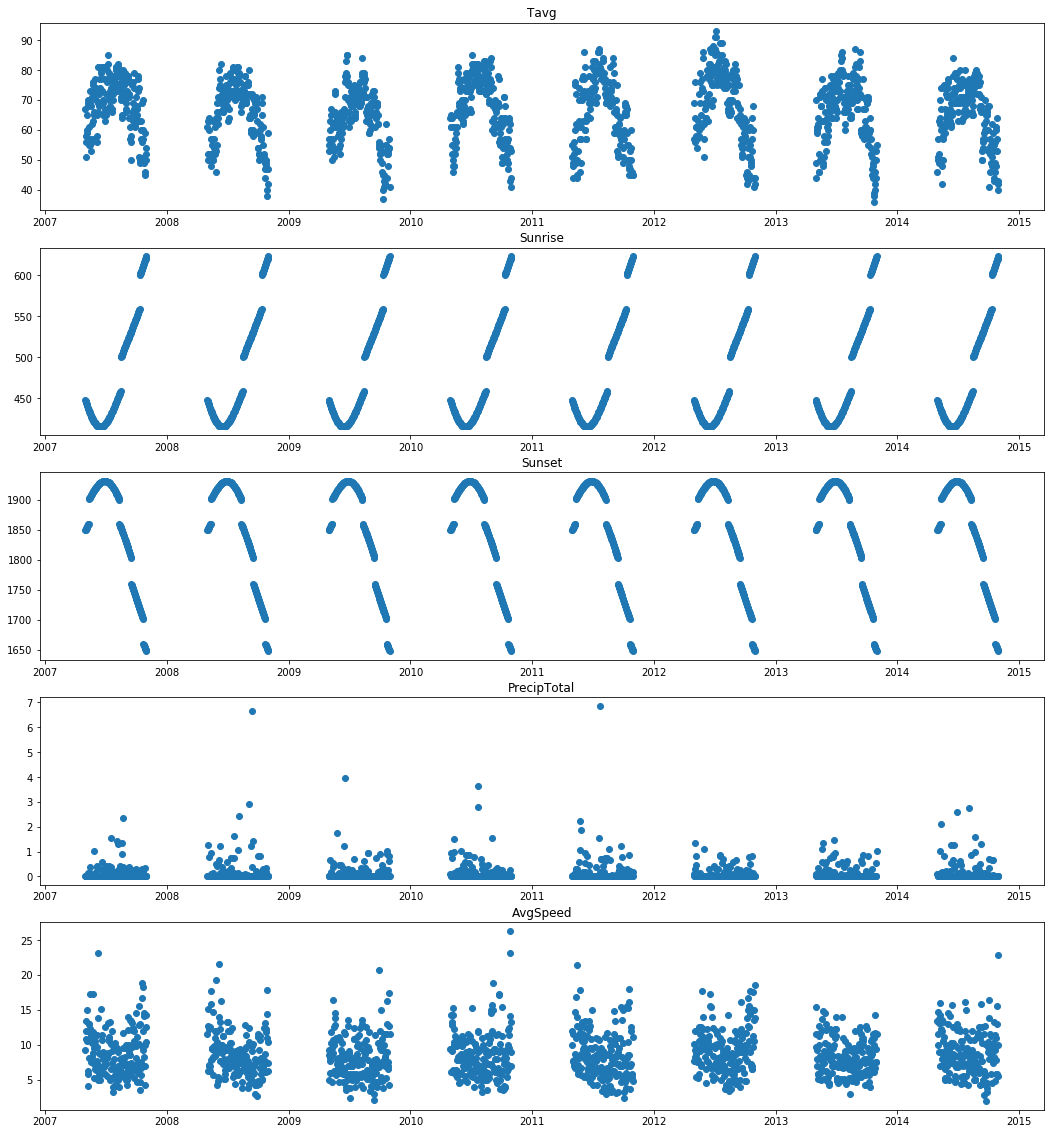

In [16]:
dexplor_utils.plot_weather_features(weather_stat1, dexplor_utils.weather_cols[2:])

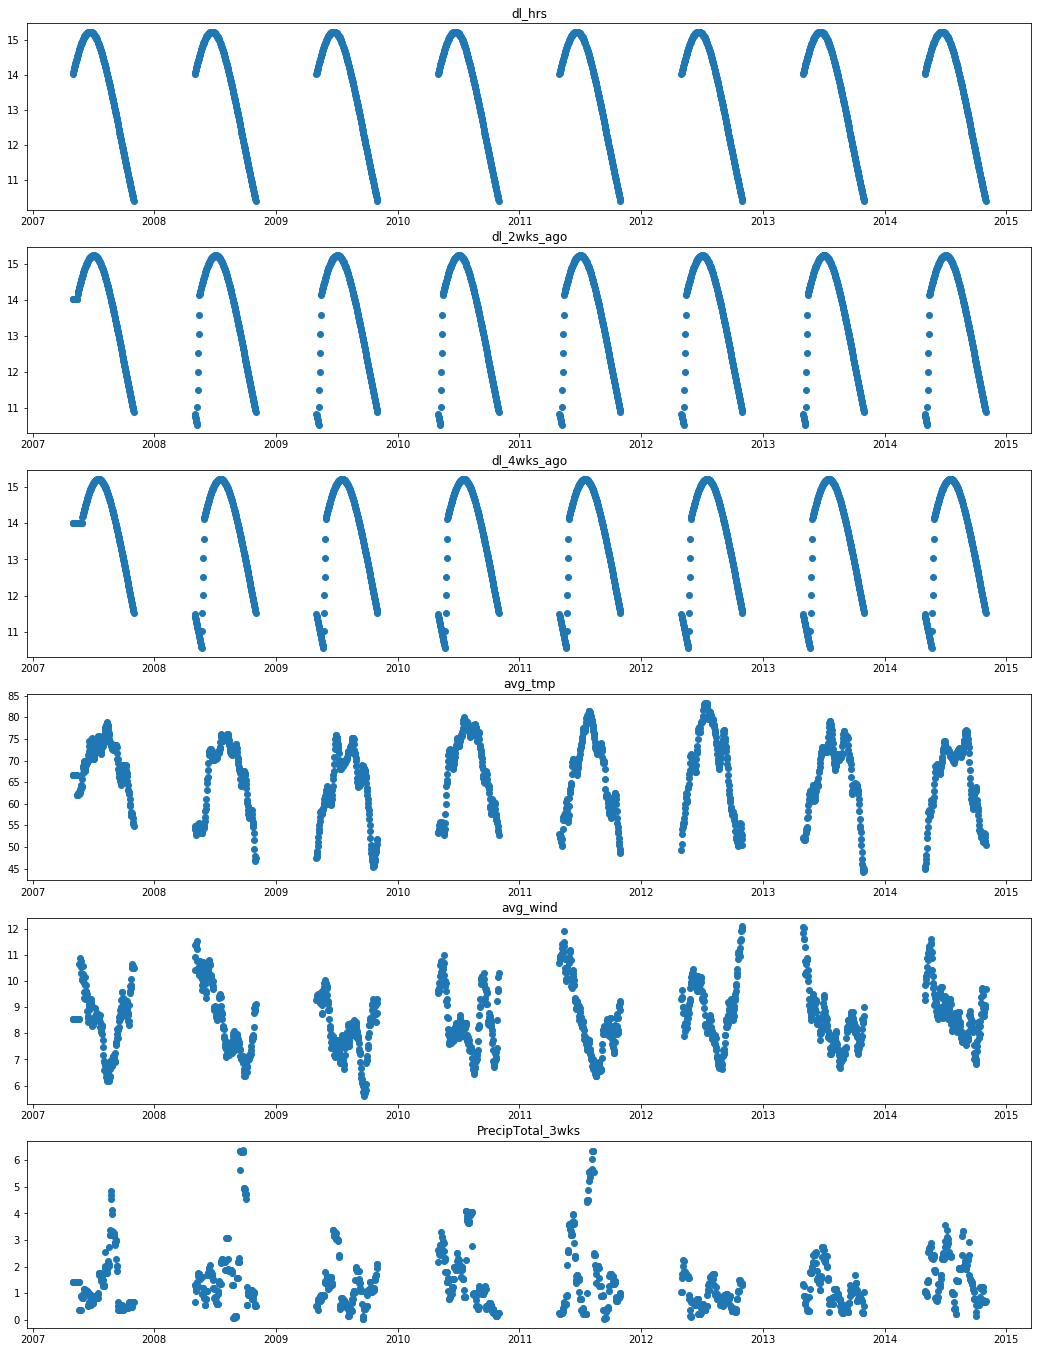

In [58]:
dexplor_utils.plot_weather_features(weather_stat1, weather_features)